In [18]:
#imporitng UNSD file to get the continents and country codes 

import pandas as pd
import matplotlib.pyplot as plt
import plotly

import plotly.express as px

df=pd.read_csv("/Users/mankaransingh/Downloads/Final_Data.csv", encoding = "ISO-8859-1")

df

df_cont = pd.read_csv("/Users/mankaransingh/Downloads/UNSD_Methodology_cont.csv", encoding = "ISO-8859-1")

df_new=pd.merge(df, df_cont,on=['Country'],how='left')
df_new['Region'].fillna("", inplace = True) 
df_new=df_new.loc[df_new['Region'] !=""]


g=df_new.set_index(['Country','Year']).sort_index()
g1=g.reset_index()
g1.columns

g1.to_csv('/Users/mankaransingh/Downloads/Final_Data_Graphs.csv')

Index(['Country', 'Year', 'Unnamed: 0', 'Status', 'Life expectancy ',
       'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Population', 'GDP',
       'ISO-alpha3 Code', 'Region'],
      dtype='object')

In [2]:
#Life Expectancy vs Level of Schooling



fig=px.scatter(g1, x="Schooling", y="Life expectancy ", animation_frame="Year", animation_group="Country",
           size="Population", color="Status", hover_name="Status",
           size_max=55, range_x=[1,25], range_y=[1,100])
fig.show()

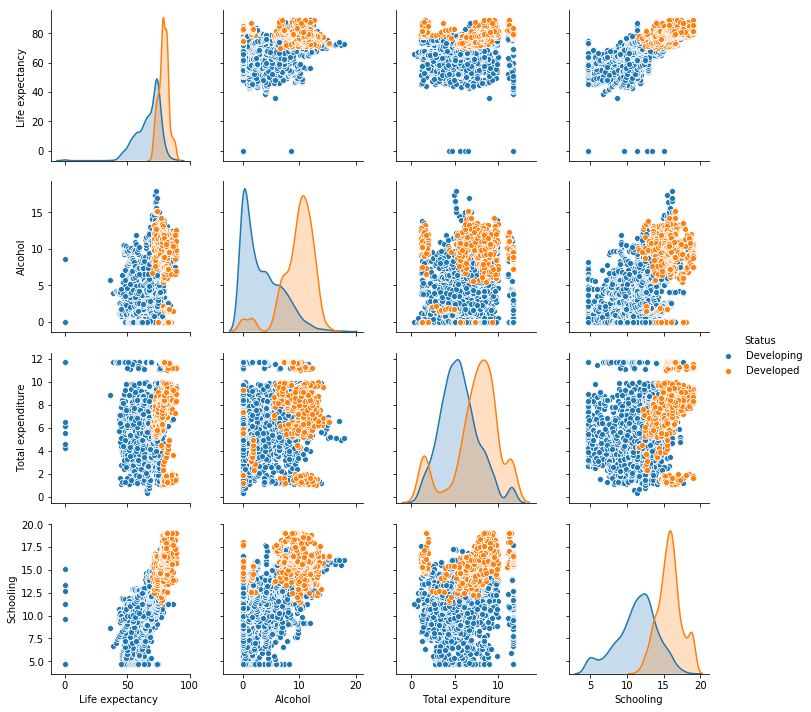

In [57]:

#Pair plot for significant factors

import seaborn as sns


df2=g1[["Life expectancy ","Status", 'Alcohol', 
       'Total expenditure', 'Schooling']]

sns.pairplot(df2,hue="Status")


In [32]:
#Animated World map for BMI

import plotly.express as px

g1=pd.read_csv("/Users/mankaransingh/Downloads/Final_Data_Graphs.csv", encoding = "ISO-8859-1")

fig = px.scatter_geo(g1, locations="ISO-alpha3 Code", color="Life expectancy ",
                     hover_name="Region", size=" BMI ",
                     animation_frame="Year",
                     projection="natural earth",
                     size_max=10)
fig.show()



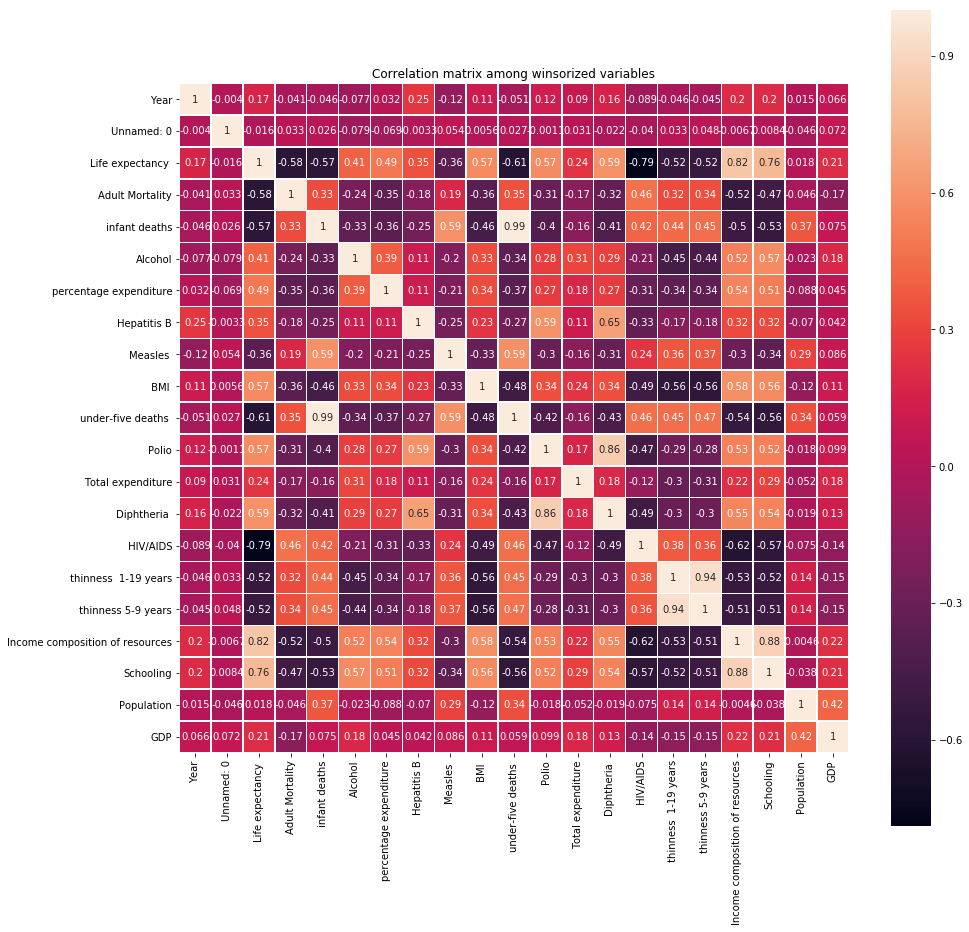

In [6]:
#Correlation matrix for all factors

correlation = g1.corr()       

plt.figure(figsize=(15,15))
sns.heatmap(correlation, square=True, annot=True, linewidths=.5)
plt.title("Correlation matrix among winsorized variables")
plt.show()